# 경로 이동

In [ ]:
ls

drive/  sample_data/


In [ ]:
%cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
%cd 광주 인공지능 사관학교/케글 대회

/content/drive/MyDrive/Colab Notebooks/광주 인공지능 사관학교/케글 대회


In [ ]:
ls

 classification220718.zip                         result_en.csv
 data_description.txt                             result_svc.csv
'소득 분류.ipynb'                                 sample_submission.csv
'미래하이테크 가이드북_미래하이태크_최종.ipynb'   test.csv
 result.csv                                       train.csv


# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ls

 classification220718.zip                         result_en.csv
 data_description.txt                             result_svc.csv
'소득 분류.ipynb'                                 sample_submission.csv
'미래하이테크 가이드북_미래하이태크_최종.ipynb'   test.csv
 result.csv                                       train.csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('sample_submission.csv')

In [ ]:
np.unique(train.iloc[:,-1], return_counts= True)

(array([0, 1]), array([22260,  7045]))

# 데이터 EDA

In [ ]:
test.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [ ]:
train

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


﻿
no : 순서

age : 나이

workclass : 일 유형

fnlwgt : CPS(Current Population Survey) 가중치 : 최근 인구 조사

education : 교육수준

education.num : 교육수준 번호

marital.status : 결혼 상태

occupation : 직업

relationship : 가족관계

race : 인종

sex : 성별

capital.gain : 자본 이익

capital.loss : 자본 손실

hours.per.week : 주당 근무시간

native.country : 본 국적

target : 소득

0 = <=50K (5만 달러 이하)

1 = >50K (5만 달러 초과)

﻿

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


## 명목형 변수 추출

In [ ]:
train.drop(['no'], axis = 1, inplace = True)

In [ ]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

## train set 전처리

### 범주형 데이터 이상치 탐지

In [ ]:
normal = train[train.columns[-2]].dtype

nominal_form = []
cascade_form = []

for i in train.columns:
  if train[i].dtype == normal:
    nominal_form.append(i)
  else:
    cascade_form.append(i)

print(nominal_form)
print(cascade_form)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


In [ ]:
for i in nominal_form:
  print(train[i].unique())

[' Private' ' Self-emp-not-inc' ' Local-gov' ' ?' ' State-gov'
 ' Self-emp-inc' ' Federal-gov' ' Without-pay' ' Never-worked']
[' 11th' ' Some-college' ' Bachelors' ' Assoc-voc' ' 9th' ' HS-grad'
 ' Masters' ' 5th-6th' ' Prof-school' ' 12th' ' 10th' ' Assoc-acdm'
 ' Doctorate' ' 7th-8th' ' 1st-4th' ' Preschool']
[' Divorced' ' Never-married' ' Married-civ-spouse' ' Separated'
 ' Married-spouse-absent' ' Widowed' ' Married-AF-spouse']
[' Machine-op-inspct' ' Other-service' ' Handlers-cleaners'
 ' Tech-support' ' Transport-moving' ' Farming-fishing' ' Prof-specialty'
 ' Priv-house-serv' ' Adm-clerical' ' Protective-serv' ' Exec-managerial'
 ' ?' ' Craft-repair' ' Sales' ' Armed-Forces']
[' Not-in-family' ' Husband' ' Unmarried' ' Other-relative' ' Own-child'
 ' Wife']
[' White' ' Asian-Pac-Islander' ' Black' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Haiti' ' Mexico' ' Puerto-Rico' ' Philippines' ' ?'
 ' Germany' ' Peru' ' Ecuador' ' Iran' ' Thailand' ' Domin

In [ ]:
nominal_outlier = [i for i in nominal_form if ' ?' in train[i].unique()]
nominal_outlier

['workclass', 'occupation', 'native-country']

In [ ]:
for i in nominal_outlier:
  print(np.unique(train[i], return_counts = True)[1]) #0인덱스 값이 각각 ' ?' 클래스의 수

[ 1663   854  1868     5 20410   987  2305  1201    12]
[1668 3440   10 3632 3609  888 1249 1811 2975  146 3724  603 3292  865
 1393]
[  495    19   111    68    53    94    61    21    96    75    20   124
    25    51    51     1    11    19    12    90    38    23    60    68
    54    13   579    28    15    25   178    53    43   117     9    74
    39    15    13 26301    50    13]


각 변수에서 이상치인 ' ?' 데이터의 수가 상당하다는 것을 알 수 있음

In [ ]:
for i in nominal_form:
  s_k=LabelEncoder().fit(train[i])
  train[i] =s_k.transform(train[i])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             29305 non-null  int64
 1   workclass       29305 non-null  int64
 2   fnlwgt          29305 non-null  int64
 3   education       29305 non-null  int64
 4   education-num   29305 non-null  int64
 5   marital-status  29305 non-null  int64
 6   occupation      29305 non-null  int64
 7   relationship    29305 non-null  int64
 8   race            29305 non-null  int64
 9   sex             29305 non-null  int64
 10  capital-gain    29305 non-null  int64
 11  capital-loss    29305 non-null  int64
 12  hours-per-week  29305 non-null  int64
 13  native-country  29305 non-null  int64
 14  income          29305 non-null  int64
dtypes: int64(15)
memory usage: 3.4 MB


In [ ]:
corr = train.corr().iloc[-1,:-1]

highly_correlated = [train.columns[:-1][i] for i in range(len(corr)) if abs(corr[i]) > 0.1]
highly_correlated

['age',
 'education-num',
 'marital-status',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

해당 데이터들을 무시하고 라벨 인코딩하여 종속 변수와 상관관계를 나타내면 종속 변수와의 상관관계의 절대값이 모두 0.1을 넘지 않는다. -> 해당 피쳐 무시 

In [ ]:
for i in nominal_outlier:
  train.drop([i], axis = 1, inplace = True)

train.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

### 연속형 데이터 이상치 처리

In [ ]:
# def get_outliers(df, col, IQR_weight=1.5):
    
#     quantiles = np.percentile(df[col].sort_values(), [25, 75])
#     quantile_1 = quantiles[0]
#     quantile_3 = quantiles[1]

#     IQR = (quantile_3 - quantile_1) * IQR_weight

#     lowest_bound = quantile_1 - IQR
#     highest_bound = quantile_3 + IQR
    
#     outliers = df[col][(df[col] < lowest_bound) | (df[col] > highest_bound)].index
    
#     return outliers

# # 각 컬럼 당 이상치 제거
# for i in train.columns:
#   outliers_idx = get_outliers(train, i)
#   train.drop(outliers_idx, axis=0, inplace=True)

# train.reset_index(drop = True, inplace = True)
# train

각각 라벨링에 대해 (0,1) 라벨링에 따라 다르게 이상치 처리

0라벨링 이상치 처리

1라벨링 이상치 처리 각각 한 후 합치기

박스 플롯으로 이상치 확인한 후, 과도한 이상치 존재시 처리

In [ ]:
train.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

### 피쳐 스케일링

In [ ]:
m_x_data = MinMaxScaler()
ck_train = m_x_data.fit_transform(train)
ck_train 

array([[0.10958904, 0.13912074, 0.06666667, ..., 0.        , 0.39795918,
        0.        ],
       [0.30136986, 0.02655301, 1.        , ..., 0.39508724, 0.55102041,
        0.        ],
       [0.24657534, 0.1240188 , 0.6       , ..., 0.        , 0.5       ,
        0.        ],
       ...,
       [0.01369863, 0.16571845, 0.        , ..., 0.        , 0.39795918,
        0.        ],
       [0.21917808, 0.09730054, 0.06666667, ..., 0.        , 0.65306122,
        0.        ],
       [0.65753425, 0.05488169, 0.73333333, ..., 0.        , 0.39795918,
        0.        ]])

# test set 전처리

In [ ]:
for i in nominal_form:
  s_k=LabelEncoder().fit(test_[i])
  test[i] =s_k.transform(test_[i])

test.info()

KeyError: ignored

In [ ]:
for i in nominal_outlier:
  test_.drop([i], axis = 1, inplace = True)

test_.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [ ]:
len(test_.columns)

11

In [ ]:
# def get_outliers(df, col, IQR_weight=1.5):
    
#     quantiles = np.percentile(df[col].sort_values(), [25, 75])
#     quantile_1 = quantiles[0]
#     quantile_3 = quantiles[1]

#     IQR = (quantile_3 - quantile_1) * IQR_weight

#     lowest_bound = quantile_1 - IQR
#     highest_bound = quantile_3 + IQR
    
#     outliers = df[col][(df[col] < lowest_bound) | (df[col] > highest_bound)].index
    
#     return outliers

# # 각 컬럼 당 이상치 제거
# for i in test_.columns:
#   outliers_idx = get_outliers(test_, i)
#   test_.drop(outliers_idx, axis=0, inplace=True)

# test_.reset_index(drop = True, inplace = True)
# test_

In [ ]:
m_x_data = MinMaxScaler()
ck_test = m_x_data.fit_transform(test_)
ck_test

array([[0.01369863, 0.15823542, 1.        , ..., 0.        , 0.        ,
        0.15306122],
       [0.16438356, 0.04802842, 0.73333333, ..., 0.        , 0.        ,
        0.39795918],
       [0.38356164, 0.01551935, 0.6       , ..., 0.        , 0.        ,
        0.39795918],
       ...,
       [0.63013699, 0.07143886, 1.        , ..., 0.04386044, 0.        ,
        0.39795918],
       [0.01369863, 0.09408457, 0.06666667, ..., 0.        , 0.        ,
        0.19387755],
       [0.19178082, 0.22367735, 0.46666667, ..., 0.        , 0.        ,
        0.45918367]])

## 각 독립변수와 종속 변수 간 상관관계

In [ ]:
train.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.017302,-0.075753,-0.010707,0.035084,-0.258136,-0.017938,-0.263515,0.026360,0.083999,0.078498,0.054413,0.073100,-0.003506,0.238460
workclass,0.017302,1.000000,-0.019199,0.015821,0.057548,-0.064475,0.255221,-0.098501,0.043100,0.095419,0.037689,0.002578,0.136815,-0.010012,0.047796
fnlwgt,-0.075753,-0.019199,1.000000,-0.022574,-0.030600,0.028180,-0.004528,0.006756,-0.026042,0.029929,-0.005051,-0.001513,-0.010154,-0.053128,-0.002994
education,-0.010707,0.015821,-0.022574,1.000000,0.358224,-0.033034,-0.019543,-0.013271,0.008130,-0.024049,0.028027,0.021188,0.055359,0.065693,0.081312
education-num,0.035084,0.057548,-0.030600,0.358224,1.000000,-0.066478,0.110267,-0.096429,0.029572,0.017029,0.127651,0.083925,0.147569,0.057464,0.331798
marital-status,-0.258136,-0.064475,0.028180,-0.033034,-0.066478,1.000000,-0.015346,0.187639,-0.067153,-0.128427,-0.044147,-0.027554,-0.186983,-0.021387,-0.198866
occupation,-0.017938,0.255221,-0.004528,-0.019543,0.110267,-0.015346,1.000000,-0.081857,0.008722,0.083736,0.026461,0.013131,0.075433,-0.012962,0.078490
relationship,-0.263515,-0.098501,0.006756,-0.013271,-0.096429,0.187639,-0.081857,1.000000,-0.118671,-0.578295,-0.061873,-0.057646,-0.249984,-0.008758,-0.257709
race,0.026360,0.043100,-0.026042,0.008130,0.029572,-0.067153,0.008722,-0.118671,1.000000,0.090411,0.010407,0.017811,0.041903,0.145420,0.075287
sex,0.083999,0.095419,0.029929,-0.024049,0.017029,-0.128427,0.083736,-0.578295,0.090411,1.000000,0.050664,0.042925,0.231437,-0.008334,0.215613


In [ ]:
corr = train.corr().iloc[-1,:-1]

highly_correlated = [train.columns[:-1][i] for i in range(len(corr)) if abs(corr[i]) > 0.1]
highly_correlated

In [ ]:
corr

age               0.238460
workclass         0.047796
fnlwgt           -0.002994
education         0.081312
education-num     0.331798
marital-status   -0.198866
occupation        0.078490
relationship     -0.257709
race              0.075287
sex               0.215613
capital-gain      0.221387
capital-loss      0.135645
hours-per-week    0.231045
native-country    0.017058
Name: income, dtype: float64

In [ ]:
highly_correlated = [train.columns[:-1][i] for i in range(len(corr)) if abs(corr[i]) > 0.1]
highly_correlated

['age',
 'education-num',
 'marital-status',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [ ]:
train_new = train[['age', 'education-num','marital-status','relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']]
train_new

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week
0,25,7,0,1,1,0,0,40
1,39,10,0,1,0,0,1721,55
2,35,13,4,1,0,0,0,50
3,64,11,0,1,0,0,0,40
4,24,10,2,0,1,0,0,70
...,...,...,...,...,...,...,...,...
29300,20,9,4,3,1,0,0,40
29301,21,9,4,3,1,0,0,40
29302,18,6,4,3,1,0,0,40
29303,33,7,4,1,1,0,0,65


종속 변수와 상관성이 높은 변수

age: 0.238460

education-num 0.331798

sex 0.215613

capital-gain 0.221387

relationship     -0.257709

marital-status   -0.198866

### 피쳐 스케일링

# 종속변수, 독립변수 나누기

In [ ]:
X = ck_train[:,:-1]
y = ck_train[:,-1]

In [ ]:
np.unique(ck_train[:,-1])

array([0., 1.])

In [ ]:
X.shape, y.shape

((29305, 11), (29305,))

In [ ]:
train.iloc[:,-1].unique()

array([0, 1])

연속형 변수의 이상치를 날리니 y값의 1정답값이 전부 사라짐

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10551    0
10552    0
10553    0
10554    0
10555    0
Name: income, Length: 10556, dtype: int64

# train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# 모델 학습

## 의사결정 나무

In [ ]:
d_tree=DecisionTreeClassifier(random_state=42)
d_tree.fit(train_x,train_y)

DecisionTreeClassifier(random_state=42)

In [ ]:
d_tree.score(train_x,train_y),d_tree.score(test_x,test_y)

(0.9998634998634999, 0.8046949638324007)

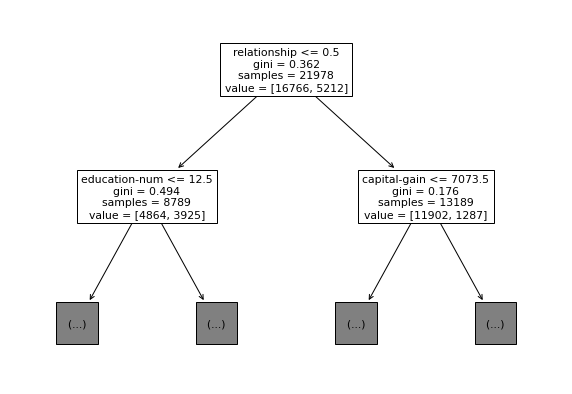

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(d_tree,max_depth=1,feature_names = X.columns)
plt.show()

In [ ]:
result = d_tree.predict(test_)

In [ ]:
result

array([0, 0, 1, ..., 0, 0, 1])

# 제출 형식 데이터로 변환

In [ ]:
no = [test['no'][i] for i in range(len(test))]
no

In [ ]:
df = pd.DataFrame(result,index = no, columns = ['income'])
df.reset_index(inplace = True)
df.columns = ['no','income']

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.columns = ['no','income']
df

,no,income
0,29306,0
1,29307,0
2,29308,1
3,29309,0
4,29310,1
...,...,...
19532,48838,0
19533,48839,0
19534,48840,0
19535,48841,0


In [ ]:
df.to_csv('result.csv', index = False)

과적합된 모델 -> 랜덤 포레스트

# 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

en = RandomForestClassifier(n_estimators=10, max_features = 2, oob_score = True)
cross_val_score(en, train_x,train_y, cv = 5).mean() #cv : 교차 검증 폴드 수

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

0.8462097925407418

In [ ]:
en.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(max_features=2, n_estimators=10, oob_score=True)

In [ ]:
en.score(train_x,train_y)

0.9878969878969879

In [ ]:
en_result = en.predict(test_)

In [ ]:
df = pd.DataFrame(en_result,index = no, columns = ['income'])
df.reset_index(inplace = True)
df.columns = ['no','income']

In [ ]:
df.to_csv('result_en.csv', index = False)

In [ ]:
en.fit(train_x,train_y)
result = en.predict(test)

In [ ]:
submit['income'] = result

교차 검증

## svm

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

svm = Pipeline([
               ("linear_svc",LinearSVC(C=1,loss ='hinge'))
])
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8134297802647741

In [ ]:
result = svm.predict(ck_test)

In [ ]:
no = [ck_test['no'][i] for i in range(len(ck_test))]
no

In [ ]:
df = pd.DataFrame(result, columns = ['income'])
df.reset_index(inplace = True)


In [ ]:
df.to_csv('result_svc.csv', index = False)

혼동행렬로 결과치 뽑아보기

train이나 validation 결과랑 원래 결과랑 확인

# 앙상블

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

en = RandomForestClassifier(n_estimators=10, max_features = 2, oob_score = True)
cross_val_score(en, train_x,train_y, cv = 5).mean() #cv : 교차 검증 폴드 수